# Importing the required data

- upload merged unemployment_vacancies2015.csv to 'data' in project
- upload shapefiles to 'data': .shp .cpg .dbf .prj .shx (from https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london)
- upload population (density) csv table into  from https://data.london.gov.uk/dataset/land-area-and-population-density-ward-and-borough

In [1]:
#setup data folder (it probably already exists)
!mkdir data

mkdir: cannot create directory ‘data’: File exists


# Prepare for mapping
- download tools and libraries

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
import matplotlib

%matplotlib inline

In [5]:
#setup environment
!pip install geopandas

     |████████████████████████████████| 921kB 1.2MB/s eta 0:00:01    |█▉                              | 51kB 1.5MB/s eta 0:00:01
     |████████████████████████████████| 11.8MB 13kB/s  eta 0:00:01    |██████████████▋                 | 5.4MB 997kB/s eta 0:00:07
     |████████████████████████████████| 1.5MB 4.0MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 10kB/s  eta 0:00:01


In [6]:
import geopandas as gp

In [7]:
!pip install pysal==2.0.0

     |████████████████████████████████| 25.0MB 17kB/s  eta 0:00:01    |████████████▏                   | 9.4MB 5.4MB/s eta 0:00:03     |█████████████████████████████▌  | 23.0MB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 112kB 7.7MB/s eta 0:00:01
  Created wheel for pysal: filename=pysal-2.0.0-cp36-none-any.whl size=25233954 sha256=eb84eabf1582b821401faeb61ae8a29c40dcf96ec9ff511b6d74be3403c0c060
  Stored in directory: /home/nbuser/.cache/pip/wheels/ca/b9/69/49a64348ddb1feaf76b426c81c1db7275cfabacd8bf4ccd778
Successfully built pysal


In [8]:
!pip install descartes

In [9]:
import descartes

In [10]:
import pylab

pylab.rcParams['figure.figsize'] = (20., 16.)

# Look at data

In [11]:
#shapefiles
data_path = "./data/London_Borough_Excluding_MHW.shp"
londonBoroughs = gp.read_file(data_path)

londonBoroughs.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


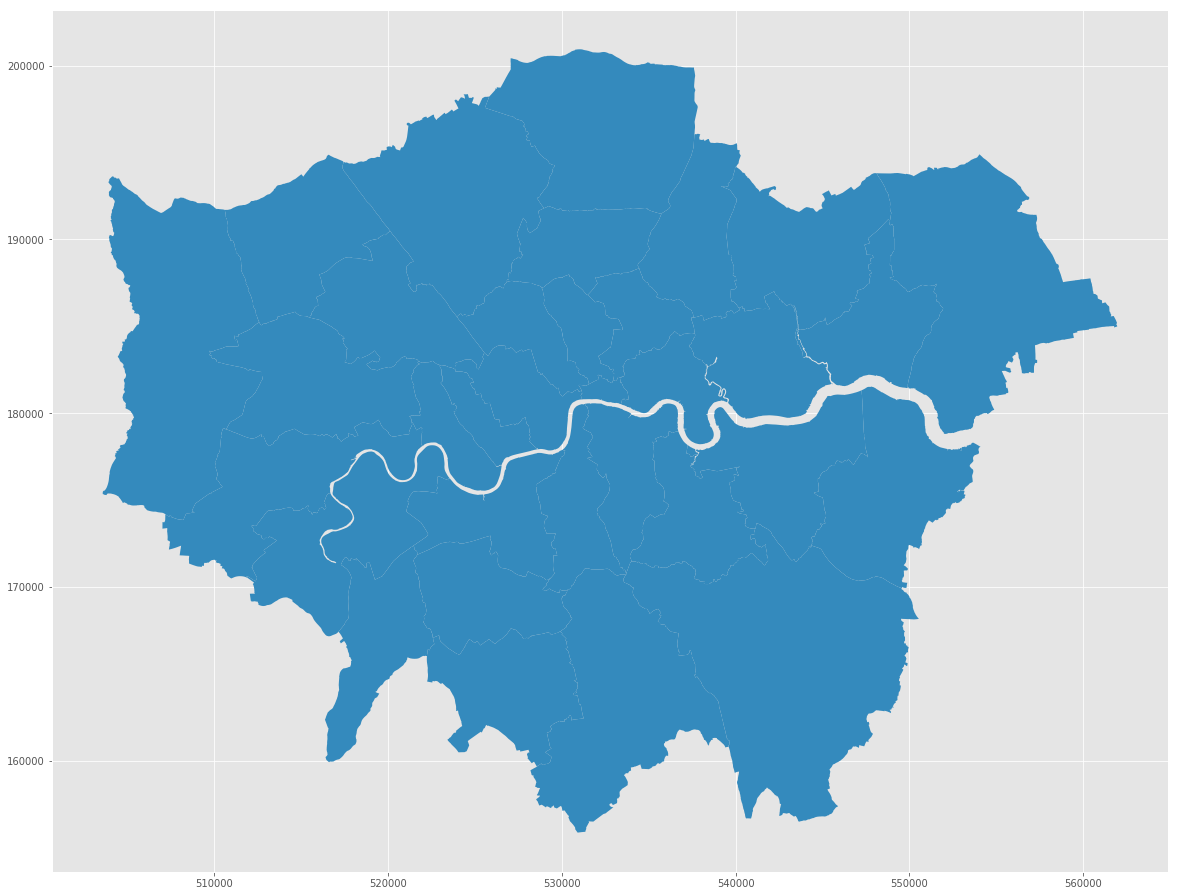

In [12]:
#checking how it looks
londonBoroughs.plot()

In [6]:
#residential workers
data_path = "~/library/data/processed/residents-working-data.csv" #use csv file
worker = pd.read_csv(data_path)

worker.head()

,Unnamed: 0,Code,E41000293,E41000294,E41000295,E41000296,E41000297,E41000298,E41000299,E41000300,...,E41000321,E41000322,E41000323,E41000324,OD0000001,OD0000003,TOTAL_RESIDENTS,X00000000,0,Residential_Workers_Rate
0,0,E41000293,14650,280,155,290,104,1855,110,250,...,4279,1292,235,6350,4764,10296,75493,6167,14650.0,0.257163
1,1,E41000294,144,36031,42,5908,91,14006,131,1787,...,3461,585,567,24662,21611,19791,172470,13371,36031.0,0.334215
2,2,E41000295,323,131,25876,161,4846,2391,510,177,...,3656,241,599,12986,8663,11979,110680,12752,25876.0,0.312062
3,3,E41000296,56,6268,37,27338,84,8735,189,8195,...,2405,276,846,22519,13058,21202,148292,7804,27338.0,0.272408
4,4,E41000297,135,209,2962,199,41000,4145,4879,275,...,4946,219,1297,22449,16167,14197,152363,11395,41000.0,0.375203


In [7]:
worker.drop('Unnamed: 0', axis=1, inplace=True)
worker.head()

,Code,E41000293,E41000294,E41000295,E41000296,E41000297,E41000298,E41000299,E41000300,E41000301,...,E41000321,E41000322,E41000323,E41000324,OD0000001,OD0000003,TOTAL_RESIDENTS,X00000000,0,Residential_Workers_Rate
0,E41000293,14650,280,155,290,104,1855,110,250,653,...,4279,1292,235,6350,4764,10296,75493,6167,14650.0,0.257163
1,E41000294,144,36031,42,5908,91,14006,131,1787,4457,...,3461,585,567,24662,21611,19791,172470,13371,36031.0,0.334215
2,E41000295,323,131,25876,161,4846,2391,510,177,175,...,3656,241,599,12986,8663,11979,110680,12752,25876.0,0.312062
3,E41000296,56,6268,37,27338,84,8735,189,8195,678,...,2405,276,846,22519,13058,21202,148292,7804,27338.0,0.272408
4,E41000297,135,209,2962,199,41000,4145,4879,275,157,...,4946,219,1297,22449,16167,14197,152363,11395,41000.0,0.375203


In [8]:
#key for merged local authorities
data_path = "~/library/data/processed/E41key.csv" #use csv file
key = pd.read_csv(data_path)

key.head()

,Unnamed: 0,0,1
0,3,E41000293,Barking and Dagenham
1,4,E41000294,Barnet
2,5,E41000295,Bexley
3,6,E41000296,Brent
4,7,E41000297,Bromley


In [9]:
key.drop('Unnamed: 0', axis=1, inplace=True)
key.head()

,0,1
0,E41000293,Barking and Dagenham
1,E41000294,Barnet
2,E41000295,Bexley
3,E41000296,Brent
4,E41000297,Bromley


In [10]:
key.columns = ['code','Borough']
key.head()

,code,Borough
0,E41000293,Barking and Dagenham
1,E41000294,Barnet
2,E41000295,Bexley
3,E41000296,Brent
4,E41000297,Bromley


In [11]:
worker = worker.merge(key, left_on='Code', right_on ='code')
worker.head()

,Code,E41000293,E41000294,E41000295,E41000296,E41000297,E41000298,E41000299,E41000300,E41000301,...,E41000323,E41000324,OD0000001,OD0000003,TOTAL_RESIDENTS,X00000000,0,Residential_Workers_Rate,code,Borough
0,E41000293,14650,280,155,290,104,1855,110,250,653,...,235,6350,4764,10296,75493,6167,14650.0,0.257163,E41000293,Barking and Dagenham
1,E41000294,144,36031,42,5908,91,14006,131,1787,4457,...,567,24662,21611,19791,172470,13371,36031.0,0.334215,E41000294,Barnet
2,E41000295,323,131,25876,161,4846,2391,510,177,175,...,599,12986,8663,11979,110680,12752,25876.0,0.312062,E41000295,Bexley
3,E41000296,56,6268,37,27338,84,8735,189,8195,678,...,846,22519,13058,21202,148292,7804,27338.0,0.272408,E41000296,Brent
4,E41000297,135,209,2962,199,41000,4145,4879,275,157,...,1297,22449,16167,14197,152363,11395,41000.0,0.375203,E41000297,Bromley


In [12]:
worker.drop('code', axis=1, inplace=True)
worker.head()

,Code,E41000293,E41000294,E41000295,E41000296,E41000297,E41000298,E41000299,E41000300,E41000301,...,E41000322,E41000323,E41000324,OD0000001,OD0000003,TOTAL_RESIDENTS,X00000000,0,Residential_Workers_Rate,Borough
0,E41000293,14650,280,155,290,104,1855,110,250,653,...,1292,235,6350,4764,10296,75493,6167,14650.0,0.257163,Barking and Dagenham
1,E41000294,144,36031,42,5908,91,14006,131,1787,4457,...,585,567,24662,21611,19791,172470,13371,36031.0,0.334215,Barnet
2,E41000295,323,131,25876,161,4846,2391,510,177,175,...,241,599,12986,8663,11979,110680,12752,25876.0,0.312062,Bexley
3,E41000296,56,6268,37,27338,84,8735,189,8195,678,...,276,846,22519,13058,21202,148292,7804,27338.0,0.272408,Brent
4,E41000297,135,209,2962,199,41000,4145,4879,275,157,...,219,1297,22449,16167,14197,152363,11395,41000.0,0.375203,Bromley


In [13]:
PROC_DATA_PATH = '~/library/data/processed/'
worker.to_csv(PROC_DATA_PATH + 'residential-worker-key.csv')

# Merging dataframe on geodataframe

In [34]:
geoworker = londonBoroughs.merge(worker, left_on='NAME', right_on='Borough')
            #geodataframe       #dataframe

In [35]:
geoworker

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Code,E41000293,...,E41000322,E41000323,E41000324,OD0000001,OD0000003,TOTAL_RESIDENTS,X00000000,0,Residential_Workers_Rate,Borough
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",E41000312,23,...,32,2661,8867,9094,6934,82434,11915,20982.0,0.364849,Kingston upon Thames
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",E41000299,90,...,197,5491,17385,15887,17006,173926,17238,48412.0,0.369692,Croydon
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",E41000297,135,...,219,1297,22449,16167,14197,152363,11395,41000.0,0.375203,Bromley
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",E41000309,29,...,94,1110,10294,11331,13131,127613,14480,31030.0,0.331949,Hounslow
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",E41000300,53,...,197,1161,19381,15343,20284,165800,11031,34302.0,0.299427,Ealing
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.9 181459.8, 549894.6 181465.7...",E41000307,7110,...,1109,175,12294,8834,12695,113551,14732,31928.0,0.358975,Havering
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510615.2 191591.3...",E41000308,37,...,111,348,7790,11415,12223,130973,17442,45948.0,0.437976,Hillingdon
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510660 191690.9, ...",E41000306,62,...,162,355,11817,11868,12440,114755,12438,21485.0,0.290645,Harrow
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201 182512.6, 525181.5 182521.1, ...",E41000296,56,...,276,846,22519,13058,21202,148292,7804,27338.0,0.272408,Brent
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.9 198355.2, 524594.3 198321.4...",E41000294,144,...,585,567,24662,21611,19791,172470,13371,36031.0,0.334215,Barnet


In [36]:
type(geoworker)

geopandas.geodataframe.GeoDataFrame

In [46]:
geoworker['Residential_Workers_Rate'] = geoworker['Residential_Workers_Rate']*100
geoworker['Residential_Workers_Rate']

0     36.484946
1     36.969171
2     37.520264
3     33.194894
4     29.942702
5     35.897526
6     43.797577
7     29.064529
8     27.240849
9     33.421465
10    20.787058
11    25.485996
12    23.529326
13    28.302206
14    31.206180
15    35.933955
16    25.399923
17    26.512021
18    33.471137
19    32.854598
20    24.862151
21    22.730844
22    26.755402
23    30.262423
24    56.435044
25    34.532714
26    32.660585
27    25.278076
28    25.996422
29    22.263607
30    25.435472
31    25.716292
Name: Residential_Workers_Rate, dtype: float64

# Creating Choropleth Map with Legend

In [47]:
original_crs = geoworker.crs
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_geoworker = geoworker.to_crs(crs=target_crs)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [48]:
import numpy as np
import matplotlib

In [49]:
# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = matplotlib.pyplot.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in range(N+1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

In [50]:
from pysal.viz.mapclassify import Quantiles

In [51]:
breaks = Quantiles(
    geoworker['Residential_Workers_Rate'].values,
    k=5)
print(breaks)

               Quantiles               
 
Lower            Upper            Count
         x[i] <= 25.407               7
25.407 < x[i] <= 26.950               6
26.950 < x[i] <= 32.079               6
32.079 < x[i] <= 35.625               6
35.625 < x[i] <= 56.435               7


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [52]:
bar_labels = ['<=%i'% b for b in breaks.bins]
print(bar_labels)

['<=25', '<=26', '<=32', '<=35', '<=56']


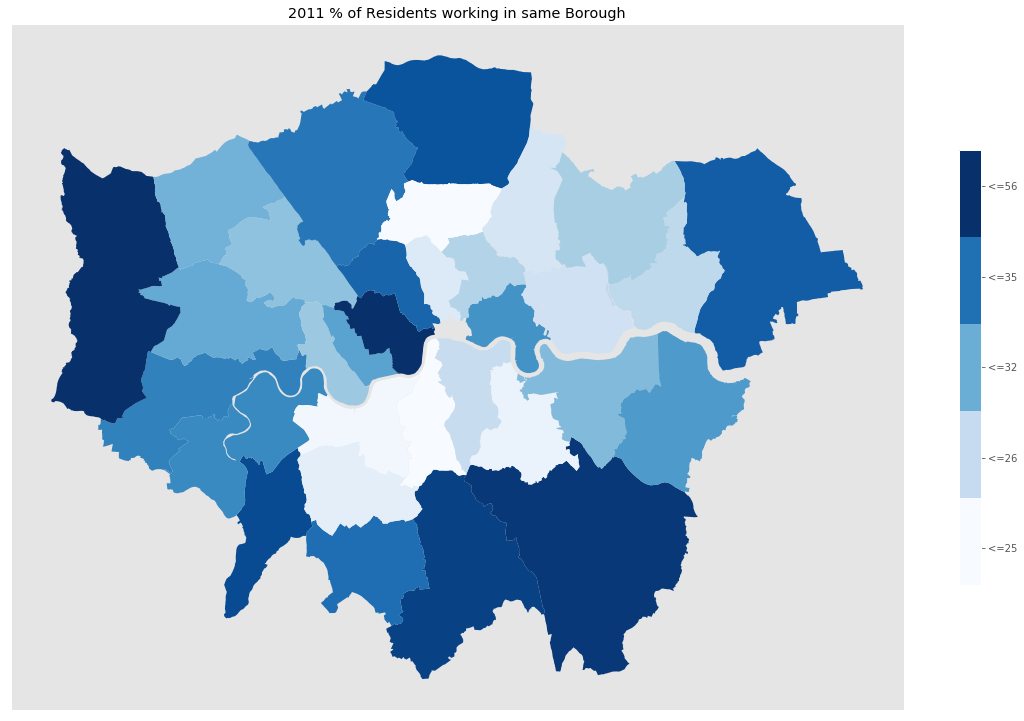

In [53]:
projected_geoworker.plot(column='Residential_Workers_Rate', cmap='Blues', scheme='quantiles', k=30)
plt.title('2011 % of Residents working in same Borough')
plt.xticks([])
plt.yticks([])
plt.savefig('./data/ResidentialWorkers.png')

cmap = plt.get_cmap('Blues')
colorbar_index(ncolors=5, cmap=cmap, shrink=0.5, labels=bar_labels)